#**EDA_ASSIGNMENT**

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


#**EDA - 1 (Bike)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("bike_details.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


 **Q 1 What is the range of selling prices in the dataset?**

In [ ]:
df['selling_price'].describe()

,selling_price
count,1061.000000
mean,59638.151744
std,56304.291973
min,5000.000000
25%,28000.000000
50%,45000.000000
75%,70000.000000
max,760000.000000


In [ ]:
print(f'the range of selling price is between {df["selling_price"].min()} and {df["selling_price"].max()}')

the range of selling price is between 5000 and 760000


**Q 2 What is the median selling price for bikes in the dataset?**

In [ ]:
median=df['selling_price'].median()
print("The median of selling price is : -",median)

The median of selling price is : - 45000.0


**Q 3 What is the most common seller type?**

In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
print("the most common seller type is individual according to value counts ")

the most common seller type is individual according to value counts 


**Q 4 How many bikes have driven more than 50,000 kilometers?**

In [ ]:
df['km_driven'].value_counts()

,count
km_driven,
20000,39
40000,38
50000,37
25000,31
15000,28
...,...
46070,1
127000,1
63000,1


In [ ]:
print("According to data the '37' bikes have driven more than '50,000' kilometers")

According to data the '37' bikes have driven more than '50,000' kilometers


**Q 5 What is the average km_driven value for each ownership type?**

In [ ]:
df.groupby('owner').agg({'km_driven': 'mean'})

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


**Q 6 What proportion of bikes are from the year 2015 or older?**

In [ ]:
list=[]
for i in df['year']:
  if i<=2015:
    list.append(i)
proportion_older_than_2015= (len(list) / len(df['year']))*100
proportion_older_than_2015

56.64467483506126

**Q 7 What is the trend of missing values across the dataset?**

In [ ]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


**Q 8 What is the highest ex_showroom_price recorded, and for which bike?**

In [ ]:
df['ex_showroom_price']=df['ex_showroom_price'].dropna()
higest_price=df['ex_showroom_price'].max()
df[(df['ex_showroom_price']==higest_price)].name
print("the bike name is Harley-Davidson Street Bob and Price is",higest_price)


the bike name is Harley-Davidson Street Bob and Price is 1278000.0


**Q 9 What is the total number of bikes listed by each seller type?**

In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
print('individual has listed :"1055" bikes ')
print('dealer has listed : "6" bikes ')

individual has listed :"1055" bikes 
dealer has listed : "6" bikes 


**Q 10 What is the relationship between selling_price and km_driven for first-owner bikes?**

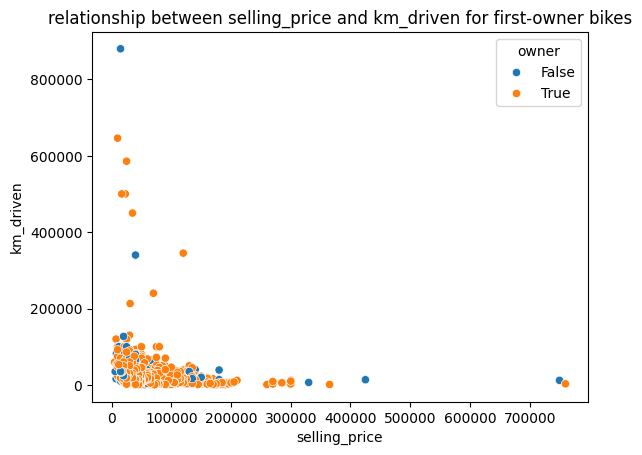

In [ ]:
sns.scatterplot(x=df['selling_price'],y=df['km_driven'],hue=df['owner']=="1st owner")
plt.xlabel("selling_price")
plt.ylabel("km_driven")
plt.title("relationship between selling_price and km_driven for first-owner bikes")
plt.show()


**Q 11 Identify and remove outliers in the km_driven column using the IQR method?**

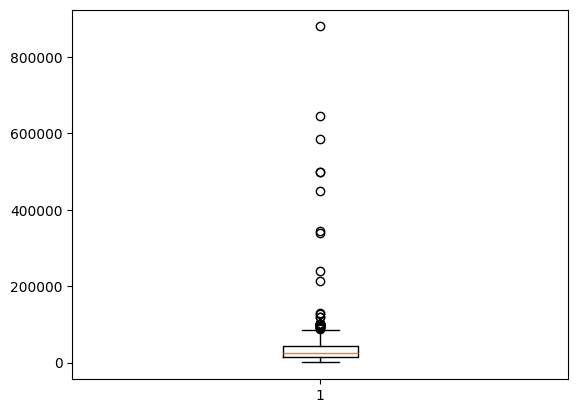

In [ ]:
plt.boxplot(df['km_driven'])
plt.show()

In [ ]:
# IQR METHOD TO REMOVE OUTLIERS
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df= df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

**Q 12  Perform a bivariate analysis to visualize the relationship between year and selling_price?**

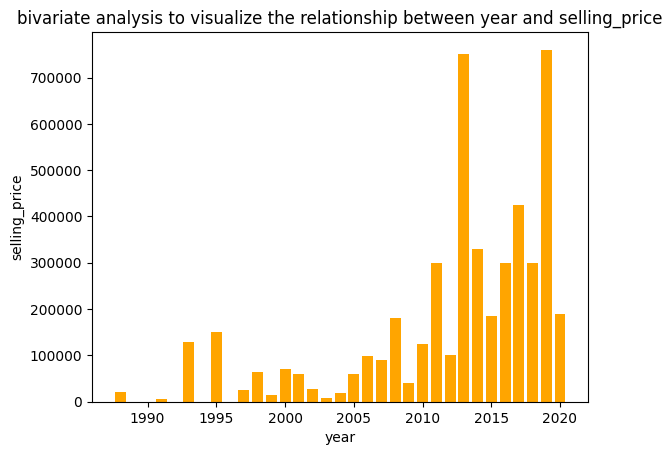

In [ ]:
plt.bar(df['year'],df['selling_price'],color='orange')
plt.xlabel("year")
plt.ylabel("selling_price")
plt.title("bivariate analysis to visualize the relationship between year and selling_price")
plt.show()

**Q 13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?**

In [ ]:
import datetime
current_year = datetime.datetime.now().year
df['bike_age'] = current_year - df['year']

average_price_by_age = df.groupby('bike_age')['selling_price'].mean().reset_index()

initial_price_avg = average_price_by_age[average_price_by_age['bike_age'] == 0]['selling_price'].iloc[0]

average_price_by_age['average_depreciation'] = initial_price_avg - average_price_by_age['selling_price']

print("Average selling price and estimated average depreciation by bike age:")
print(average_price_by_age[['bike_age', 'selling_price', 'average_depreciation']])

plt.figure(figsize=(10, 6))
sns.lineplot(x='bike_age', y='selling_price', data=average_price_by_age)
plt.xlabel("Bike Age (Years)")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price vs. Bike Age")
plt.grid(True)
plt.show()

**Q 14 Which bike names are priced significantly above the average price for their manufacturing year?**

In [ ]:
average_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
average_price_by_year = average_price_by_year.rename(columns={'selling_price': 'average_selling_price_year'})

df_merged = pd.merge(df, average_price_by_year, on='year', how='left')

df_merged['price_difference_from_avg'] = df_merged['selling_price'] - df_merged['average_selling_price_year']

std_price_difference = df_merged['price_difference_from_avg'].std()
threshold = 1.5 * std_price_difference

bikes_above_average = df_merged[df_merged['price_difference_from_avg'] > threshold]

print("Bike names priced significantly above the average price for their manufacturing year:")
print(bikes_above_average[['name', 'year', 'selling_price', 'average_selling_price_year', 'price_difference_from_avg']])


Bike names priced significantly above the average price for their manufacturing year:
                                     name  year  selling_price  \
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
42                           KTM 390 Duke  2017         175000   
70                    Mahindra Mojo XT300  2017         165000   
127      Royal Enfield Continental GT 650  2019         299000   
131            Harley-Davidson Street Bob  2013         750000   
142                            KTM RC 390  2017         180000   
145                          KTM 390 Duke  2017         170000   
174             Royal Enfield Classic 350  2018         170000   
207              Bajaj Dominar 400 [2018]  2018         170000   
236                            KTM RC 390  2017         210000   
255         Royal Enfield Interceptor 650  2019         260000   
278                     Bajaj Dominar 400  2019         

**Q 15 Develop a correlation matrix for numeric columns and visualize it using a heatmap?**

<Axes: >

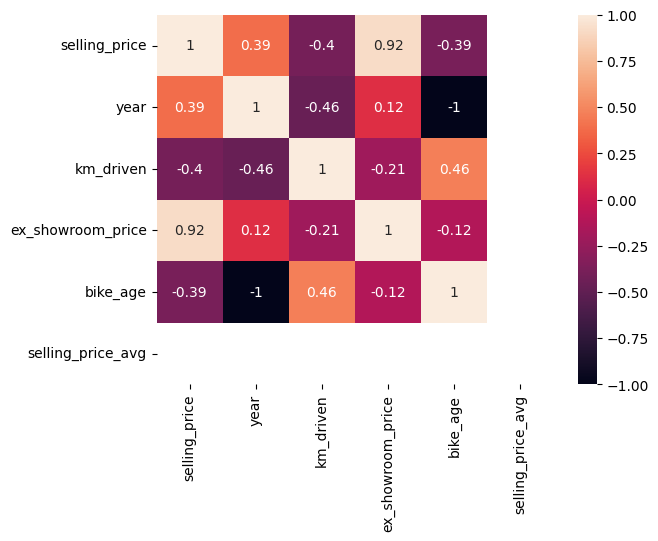

In [ ]:
numerical_features= [feature for feature in df.columns if df[feature].dtype !='O']
corelation=df.corr(numeric_only=True)
sns.heatmap(corelation,annot=True)

#**EDA - 2 (Car Sale)**

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Car Sale.csv to Car Sale.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_c=pd.read_csv("car_sales.csv")
df_c

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


**Q 1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?**

In [ ]:
df_c.groupby('Dealer_Name')['Price ($)'].mean()


,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


**Q 2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?**

In [ ]:
df_c.groupby('Company')['Price ($)'].std()

,Price ($)
Company,
Acura,8183.046414
Audi,12904.243867
BMW,15065.578723
Buick,17142.232626
Cadillac,19517.120220
Chevrolet,13311.063223
Chrysler,11583.286811
Dodge,11187.592085
Ford,15849.090227


**Q 3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?**

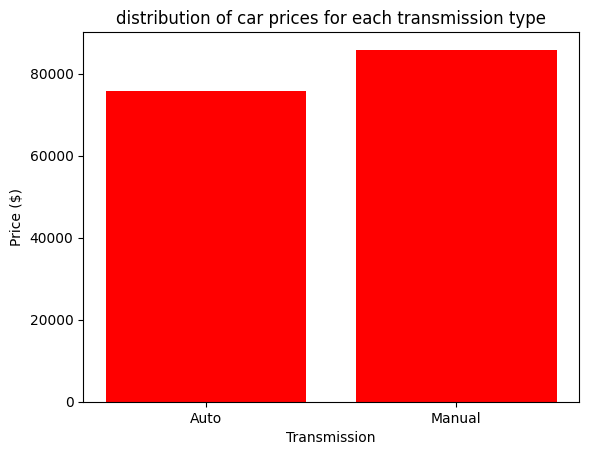

In [ ]:
plt.bar(df_c['Transmission'],df_c['Price ($)'],color='red')
plt.xlabel("Transmission")
plt.ylabel("Price ($)")
plt.title("distribution of car prices for each transmission type")
plt.show()

In [ ]:
iqr_transmission = df_c.groupby('Transmission')['Price ($)'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
iqr_transmission

,Price ($)
Transmission,
Auto,16500.0
Manual,17000.0


**Q 4 What is the distribution of car prices across different regions?**

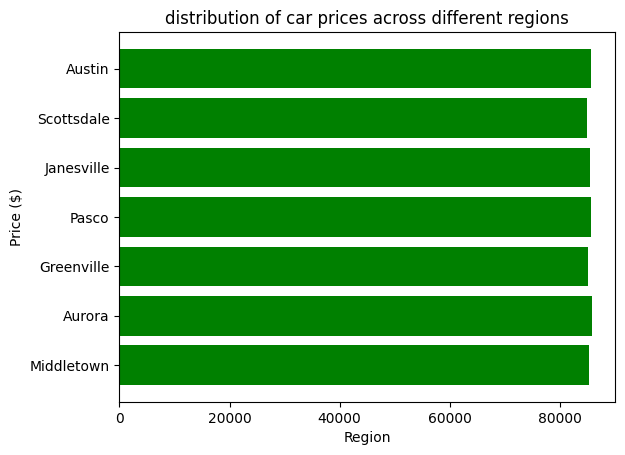

In [ ]:
plt.barh(df_c['Dealer_Region'],df_c['Price ($)'],color='green')
plt.xlabel("Region")
plt.ylabel("Price ($)")
plt.title("distribution of car prices across different regions")
plt.show()

**Q 5 What is the distribution of cars based on body styles?**

In [ ]:
df_c.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

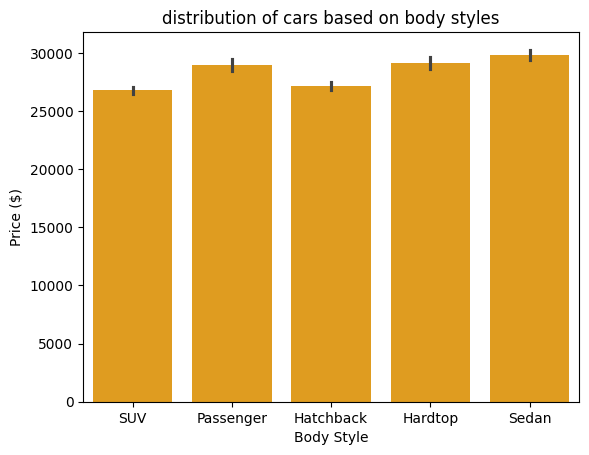

In [ ]:
sns.barplot(x=df_c['Body Style'],y=df_c['Price ($)'],color='orange')
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.title("distribution of cars based on body styles")

plt.show()

**Q 6 How does the average selling price of cars vary by customer gender and annual income?**

In [ ]:
df_c.groupby('Gender')[['Annual Income','Price ($)']].mean()

,Annual Income,Price ($)
Gender,,
Female,755973.021339,28277.265270
Male,851184.044207,28039.429407


**Q 7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?**

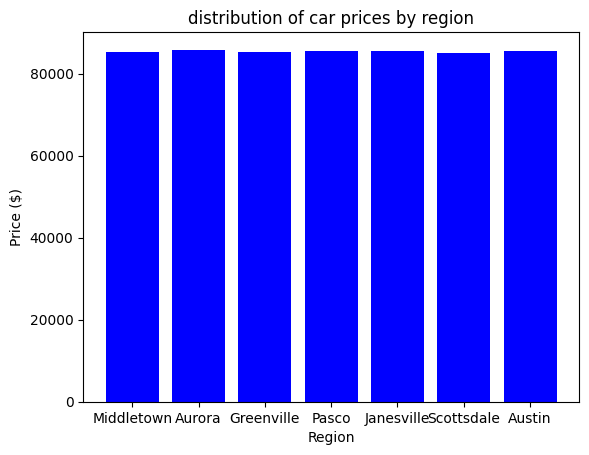

,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Greenville,3128
Middletown,3128


In [ ]:
plt.bar(df_c['Dealer_Region'],df_c['Price ($)'],color='blue')
plt.xlabel("Region")
plt.ylabel("Price ($)")
plt.title("distribution of car prices by region")
plt.show()

In [ ]:
df_c['Dealer_Region'].value_counts()

,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Greenville,3128
Middletown,3128


**Q 8 How does the average car price differ between cars with different engine sizes?**

In [ ]:
df_c.groupby('Engine')['Price ($)'].mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


**Q 9 How do car prices vary based on the customer’s annual income bracket?**

<ipython-input-15-83f506740617>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Annual Income', y='Price ($)', data=df_c, palette='viridis')


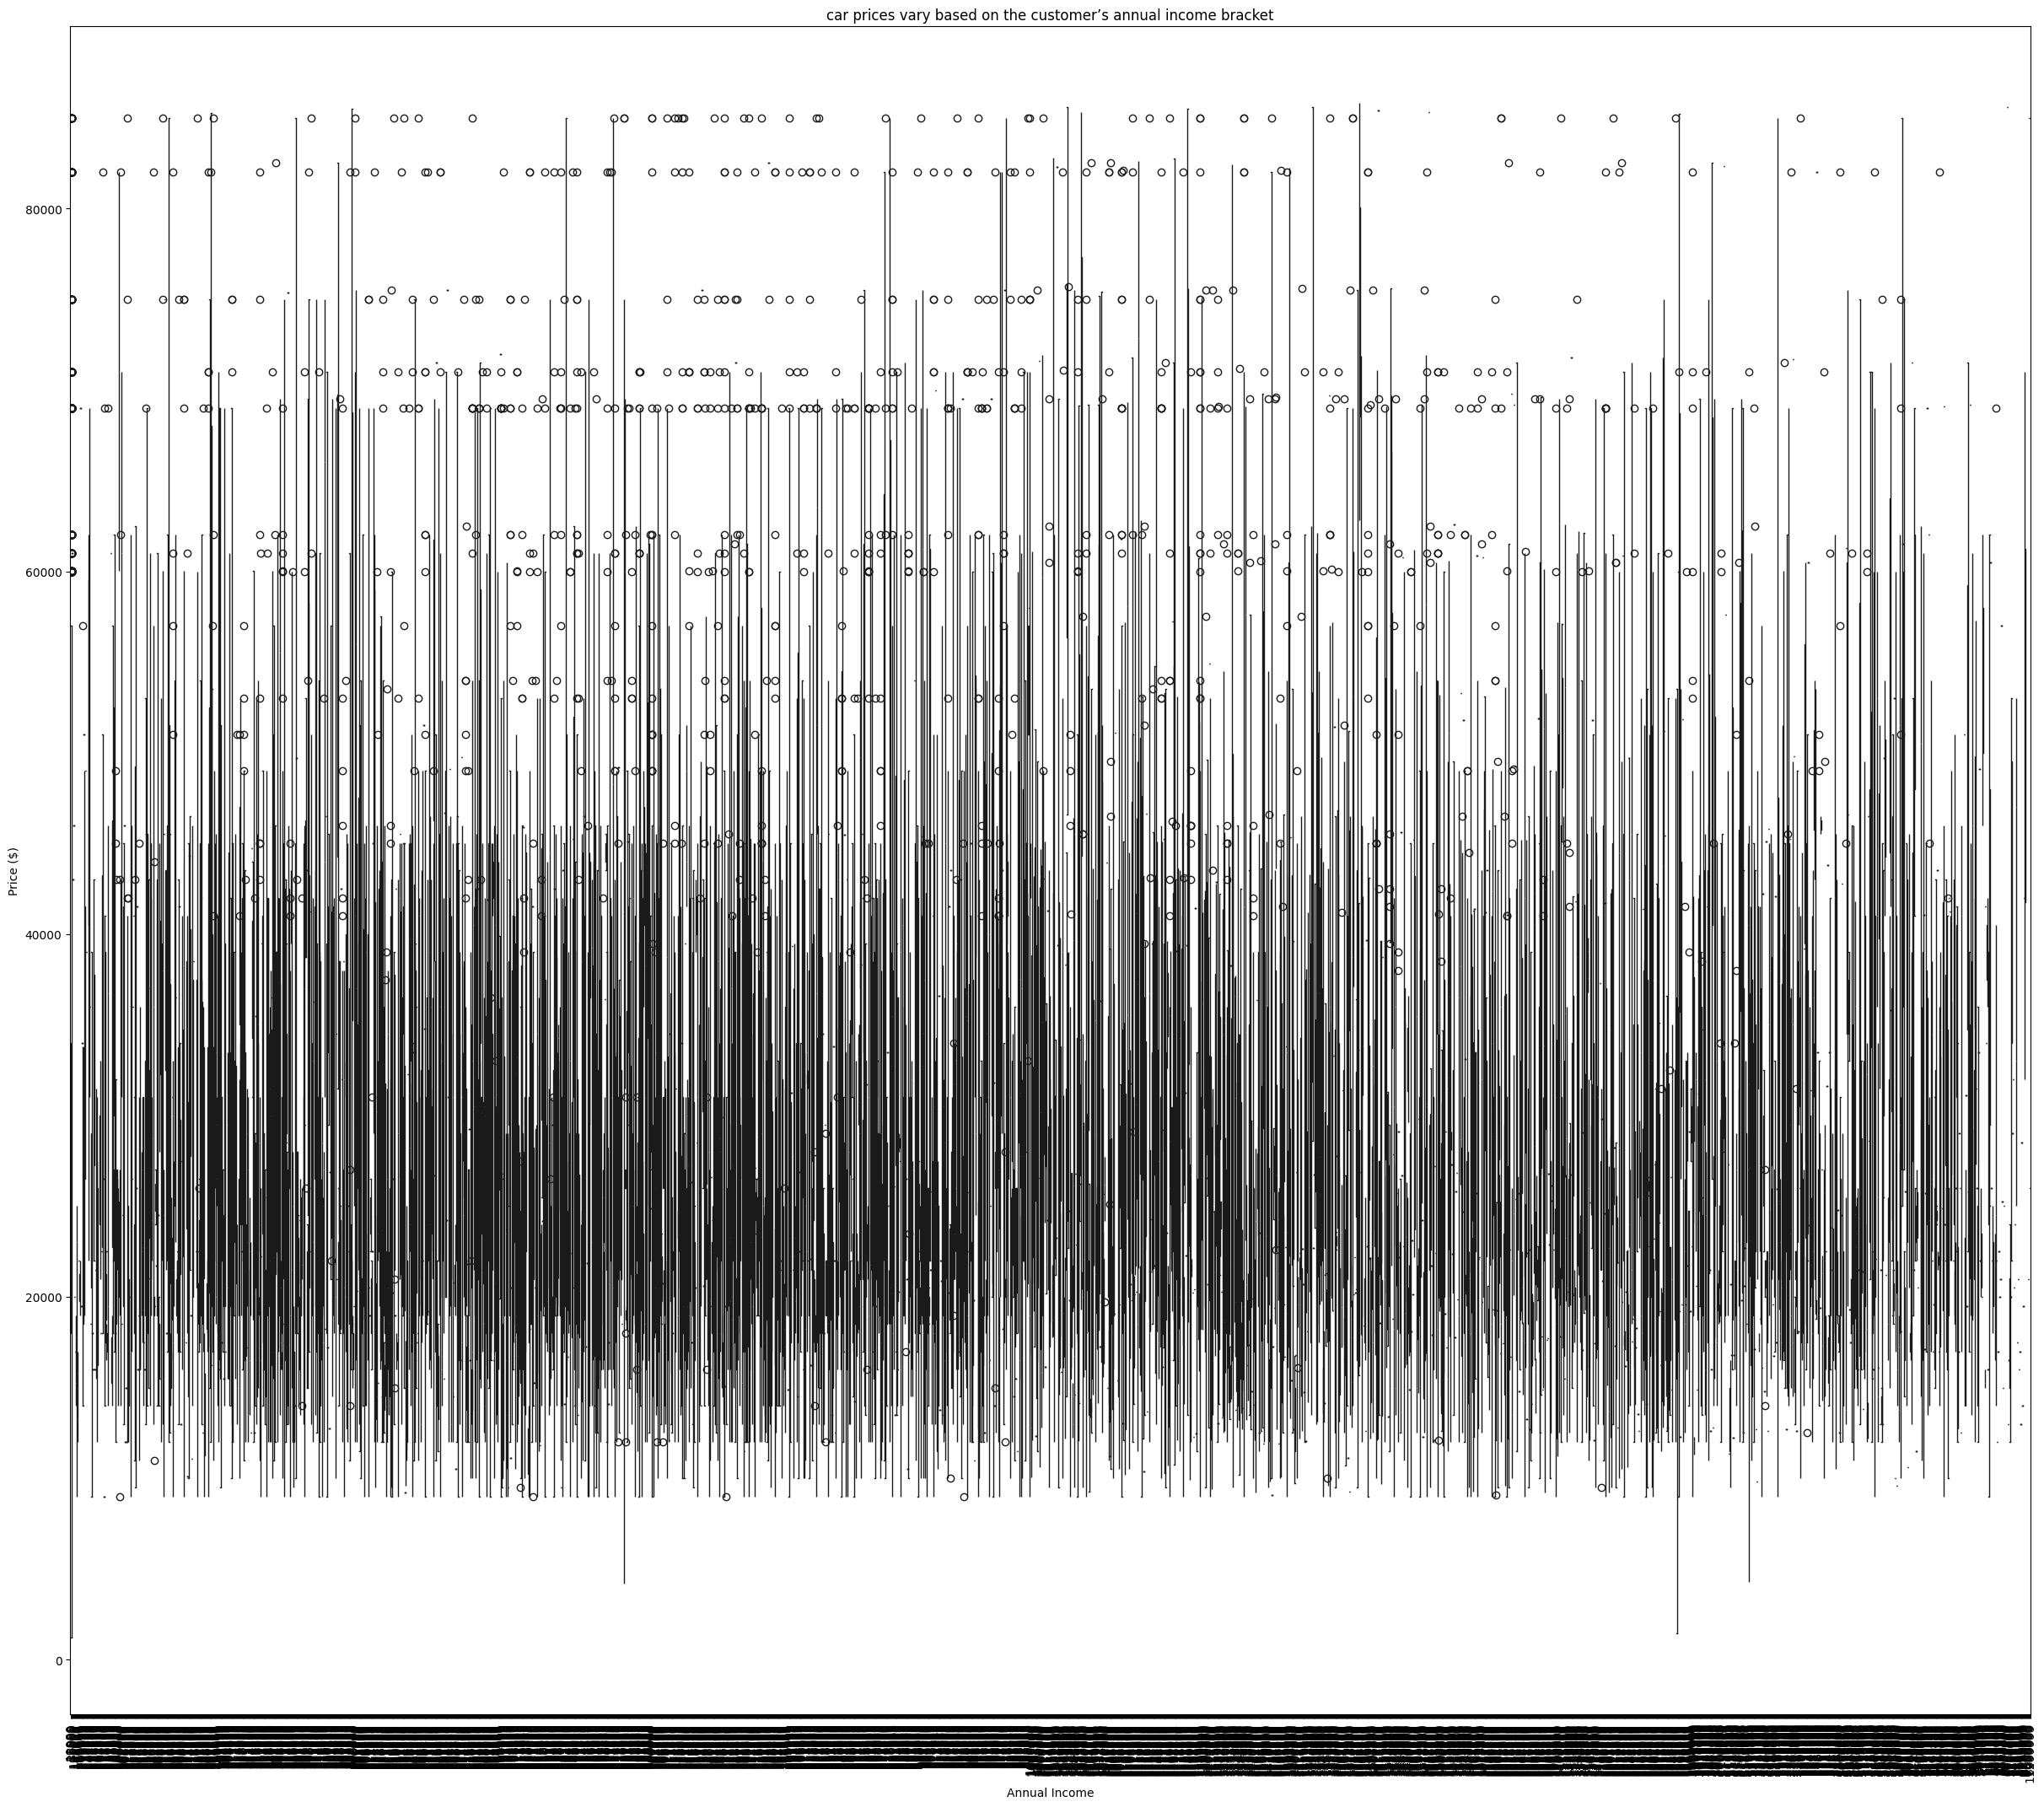

In [ ]:
plt.figure(figsize=(30, 26))
sns.boxplot(x='Annual Income', y='Price ($)', data=df_c, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Annual Income")
plt.ylabel("Price ($)")
plt.title("car prices vary based on the customer’s annual income bracket")
plt.show()

**Q 10  What are the top 5 car models with the highest number of sales, and how does their price distribution look?**

Top 5 car models with the highest number of sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


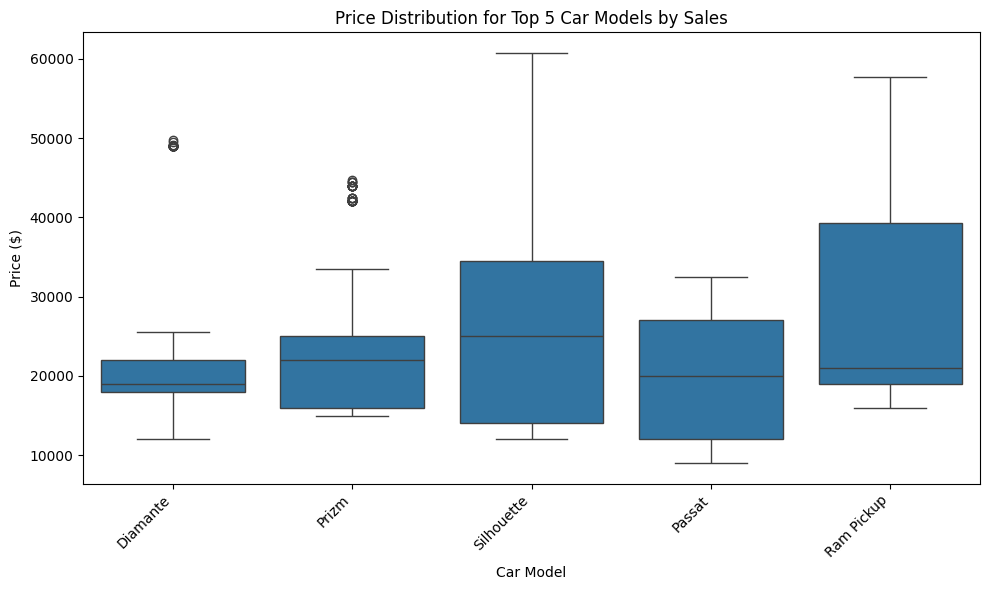

In [ ]:
top_5_models = df_c['Model'].value_counts().head().index.tolist()
df_top_5 = df_c[df_c['Model'].isin(top_5_models)]

print("Top 5 car models with the highest number of sales:")
print(df_c['Model'].value_counts().head(5))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=df_top_5, order=top_5_models)
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.title("Price Distribution for Top 5 Car Models by Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Q 11 How does car price vary with engine size across different car colors, and which colors have the highest price
variation?**

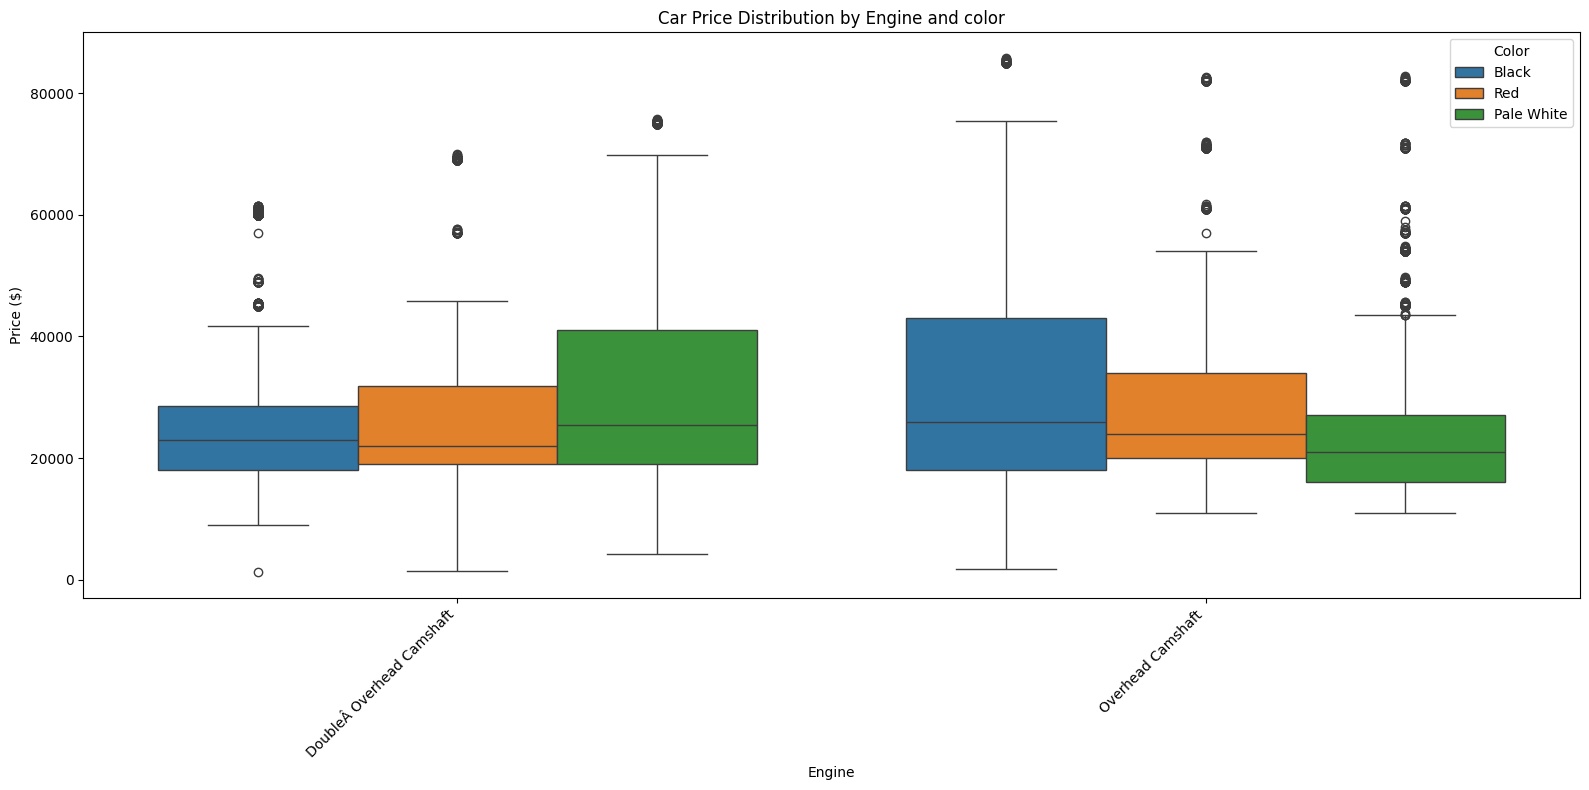

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df_c)
plt.xlabel("Engine")
plt.ylabel("Price ($)")
plt.title("Car Price Distribution by Engine and color")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_c.groupby('Color')['Price ($)'].std()

,Price ($)
Color,
Black,15286.065976
Pale White,14077.346859
Red,15519.360962


**Q 12 Is there any seasonal trend in car sales based on the date of sale?**

In [ ]:
df_c['Date'] = pd.to_datetime(df_c['Date'])
df_c['Month'] = df_c['Date'].dt.month
df_c['Year'] = df_c['Date'].dt.year
df_c['Month'].value_counts(ascending=True)


,count
Month,
2,735
1,790
3,1535
4,1655
8,1705
6,1715
7,1725
10,1830
5,1895


In [ ]:
print("yes according to sale in month their are more sale in last 3 months")


yes according to sale in month their are more sale in last 3 months


**Q 13  How does the car price distribution change when considering different combinations of body style and
transmission type?**

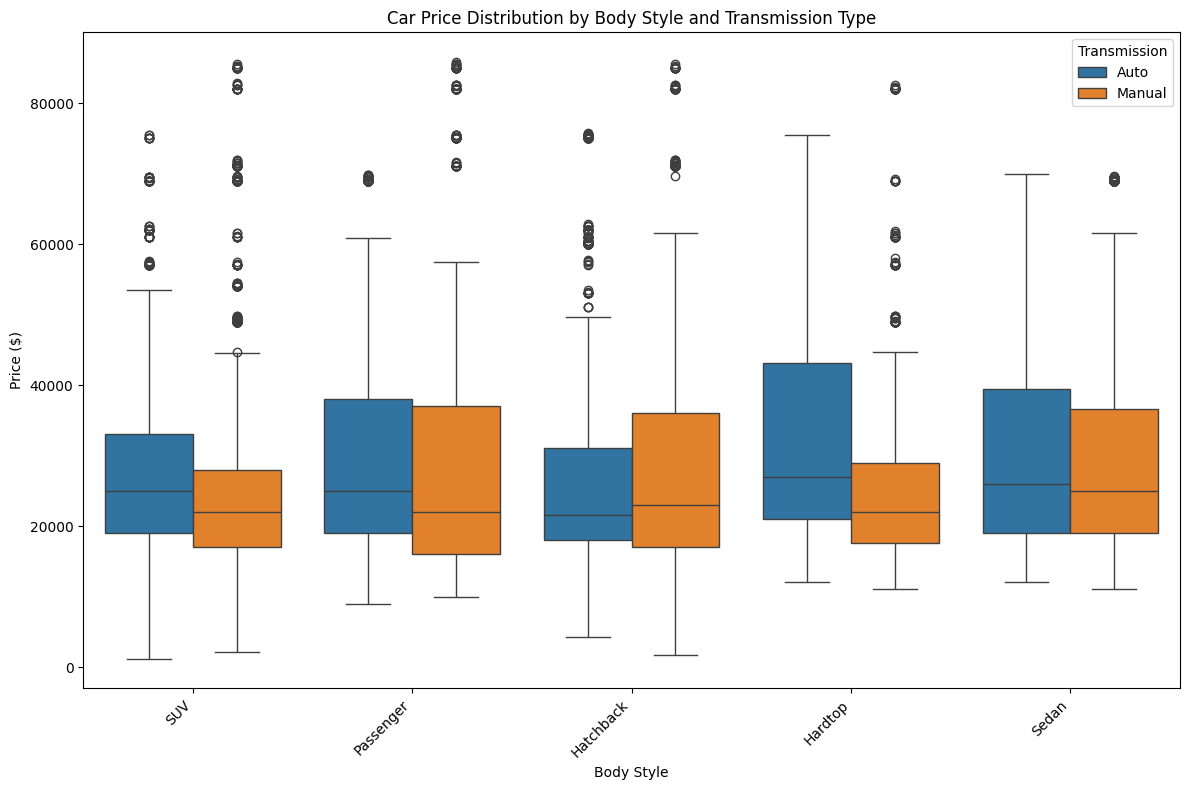

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df_c)
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Q 14 What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?**

In [ ]:
df_c['Engine'].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [ ]:
df_c['Engine']=df_c['Engine'].replace("DoubleÂ\xa0Overhead Camshaft","0").replace("Overhead Camshaft",'1')

In [ ]:
df_c['Engine'].unique()

array(['0', '1'], dtype=object)

In [ ]:
df_c['Engine']=df_c['Engine'].astype(int)

In [ ]:
data=[df_c['Price ($)'],df_c['Engine'],df_c['Annual Income']]
df_data=pd.DataFrame(data)
df_data

,0,1,2,3,4,5,6,7,8,9,...,23896,23897,23898,23899,23900,23901,23902,23903,23904,23905
Price ($),26000,19000,31500,14000,24500,12000,14000,42000,82000,15000,...,41000,15000,24000,62000,19000,12000,16000,21000,31000,27500
Engine,0,0,1,1,0,1,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
Annual Income,13500,1480000,1035000,13500,1465000,850000,1600000,13500,815000,13500,...,761000,520000,530000,13500,771000,13500,900000,705000,13500,1225000


In [ ]:
corelation_c=df_data.corr(numeric_only=True)
corelation_c


,0,1,2,3,4,5,6,7,8,9,...,23896,23897,23898,23899,23900,23901,23902,23903,23904,23905
0,1.000000,0.033385,0.048940,0.891608,0.036798,0.034507,0.029808,0.974672,0.113450,0.916926,...,0.070058,0.047526,0.062263,0.943662,0.043793,0.823672,0.037726,0.048363,0.995342,0.041849
1,0.033385,1.000000,0.999879,0.482323,0.999994,0.999999,0.999994,-0.190977,0.996777,0.429446,...,0.999326,0.999900,0.999582,-0.299223,0.999946,0.594248,0.999991,0.999888,-0.063128,0.999964
2,0.048940,0.999879,1.000000,0.495901,0.999926,0.999896,0.999817,-0.175673,0.997905,0.443452,...,0.999776,0.999999,0.999911,-0.284332,0.999987,0.606697,0.999937,1.000000,-0.047584,0.999975
3,0.891608,0.482323,0.495901,1.000000,0.485311,0.483306,0.479185,0.767758,0.551038,0.998235,...,0.514160,0.494671,0.507445,0.691537,0.491420,0.991165,0.486123,0.495399,0.843798,0.489725
4,0.036798,0.999994,0.999926,0.485311,1.000000,0.999997,0.999976,-0.187624,0.997046,0.432527,...,0.999445,0.999942,0.999675,-0.295962,0.999975,0.596992,1.000000,0.999933,-0.059720,0.999987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,0.823672,0.594248,0.606697,0.991165,0.596992,0.595151,0.591366,0.675991,0.656850,0.981538,...,0.623378,0.605571,0.617251,0.589620,0.602593,1.000000,0.597736,0.606237,0.765163,0.601040
23902,0.037726,0.999991,0.999937,0.486123,1.000000,0.999995,0.999969,-0.186712,0.997116,0.433364,...,0.999476,0.999952,0.999698,-0.295075,0.999982,0.597736,1.000000,0.999943,-0.058793,0.999991
23903,0.048363,0.999888,1.000000,0.495399,0.999933,0.999904,0.999828,-0.176242,0.997868,0.442934,...,0.999764,1.000000,0.999903,-0.284886,0.999990,0.606237,0.999943,1.000000,-0.048162,0.999979
23904,0.995342,-0.063128,-0.047584,0.843798,-0.059720,-0.062008,-0.066700,0.991693,0.017132,0.874181,...,-0.026443,-0.048998,-0.034251,0.971170,-0.052730,0.765163,-0.058793,-0.048162,1.000000,-0.054673


In [ ]:
sns.heatmap(corelation_c,annot=True)

**Q 15 How does the average car price vary across different car models and engine types?**

In [ ]:
df_c.groupby(['Model','Engine'])['Price ($)'].mean()

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64

#**EDA 3 (amazon)**

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_a=pd.read_csv("amazon.csv")
df_a

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

**Q 1 What is the average rating for each product category?**

In [ ]:
df_a.dropna()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
df_a['category'].dtype

dtype('O')

In [ ]:
df_a['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [ ]:
df_a['rating']=df['rating'].replace("1",'0')
df_a['rating']=df['rating'].astype(float)

In [ ]:
df_a.groupby('category')['rating'].mean()

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


**Q 2 What are the top rating_count products by category?**

In [ ]:
df_a['rating_count'] = df_a['rating_count'].str.replace(',', '', regex=False)
df_a['rating_count'] = df_a['rating_count'].str.replace('.', '', regex=False)
df_a = df_a.dropna(subset=['rating_count', 'category'])
df_a['rating_count']=df_a['rating_count'].astype(int)


In [ ]:
df_a.groupby('category')['rating_count'].max()

,rating_count
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,1118
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4426
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,7222
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,14969
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,7352
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",5792
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",6199
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",5719


**Q 3 What is the distribution of discounted prices vs. actual prices?**

In [ ]:
df_a.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
df['discounted_price']=df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)


In [ ]:
df['discounted_price']

,discounted_price
0,399.0
1,199.0
2,199.0
3,329.0
4,154.0
...,...
1460,379.0
1461,2280.0
1462,2219.0
1463,1399.0


In [ ]:
df['actual_price']=df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

In [ ]:
df['actual_price']

,actual_price
0,1099.0
1,349.0
2,1899.0
3,699.0
4,399.0
...,...
1460,919.0
1461,3045.0
1462,3080.0
1463,1890.0


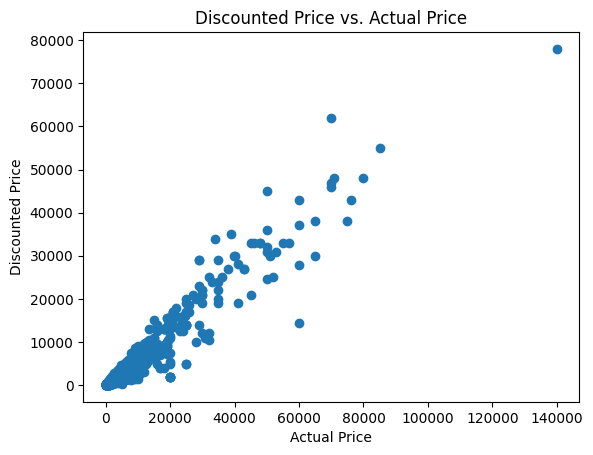

In [ ]:
plt.scatter(df['actual_price'], df['discounted_price'])
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.title("Discounted Price vs. Actual Price")
plt.show()

**Q 4 How does the average discount percentage vary across categories?**

In [ ]:
df_a['discount_percentage'].unique()

array(['64%', '43%', '90%', '53%', '61%', '85%', '65%', '23%', '50%',
       '33%', '55%', '63%', '69%', '60%', '13%', '44%', '38%', '39%',
       '46%', '41%', '70%', '42%', '72%', '25%', '51%', '73%', '0%',
       '80%', '28%', '67%', '58%', '35%', '45%', '62%', '54%', '27%',
       '77%', '56%', '78%', '31%', '86%', '47%', '37%', '75%', '32%',
       '68%', '66%', '22%', '57%', '17%', '52%', '88%', '20%', '59%',
       '40%', '26%', '29%', '83%', '71%', '15%', '76%', '48%', '82%',
       '36%', '89%', '87%', '24%', '34%', '11%', '91%', '7%', '19%',
       '79%', '21%', '81%', '18%', '49%', '30%', '84%', '10%', '6%',
       '14%', '74%', '4%', '5%', '16%', '8%', '2%', '94%', '12%', '3%',
       '9%'], dtype=object)

In [ ]:
df_a['discount_percentage']=df_a['discount_percentage'].str.replace('%', '').astype(float)

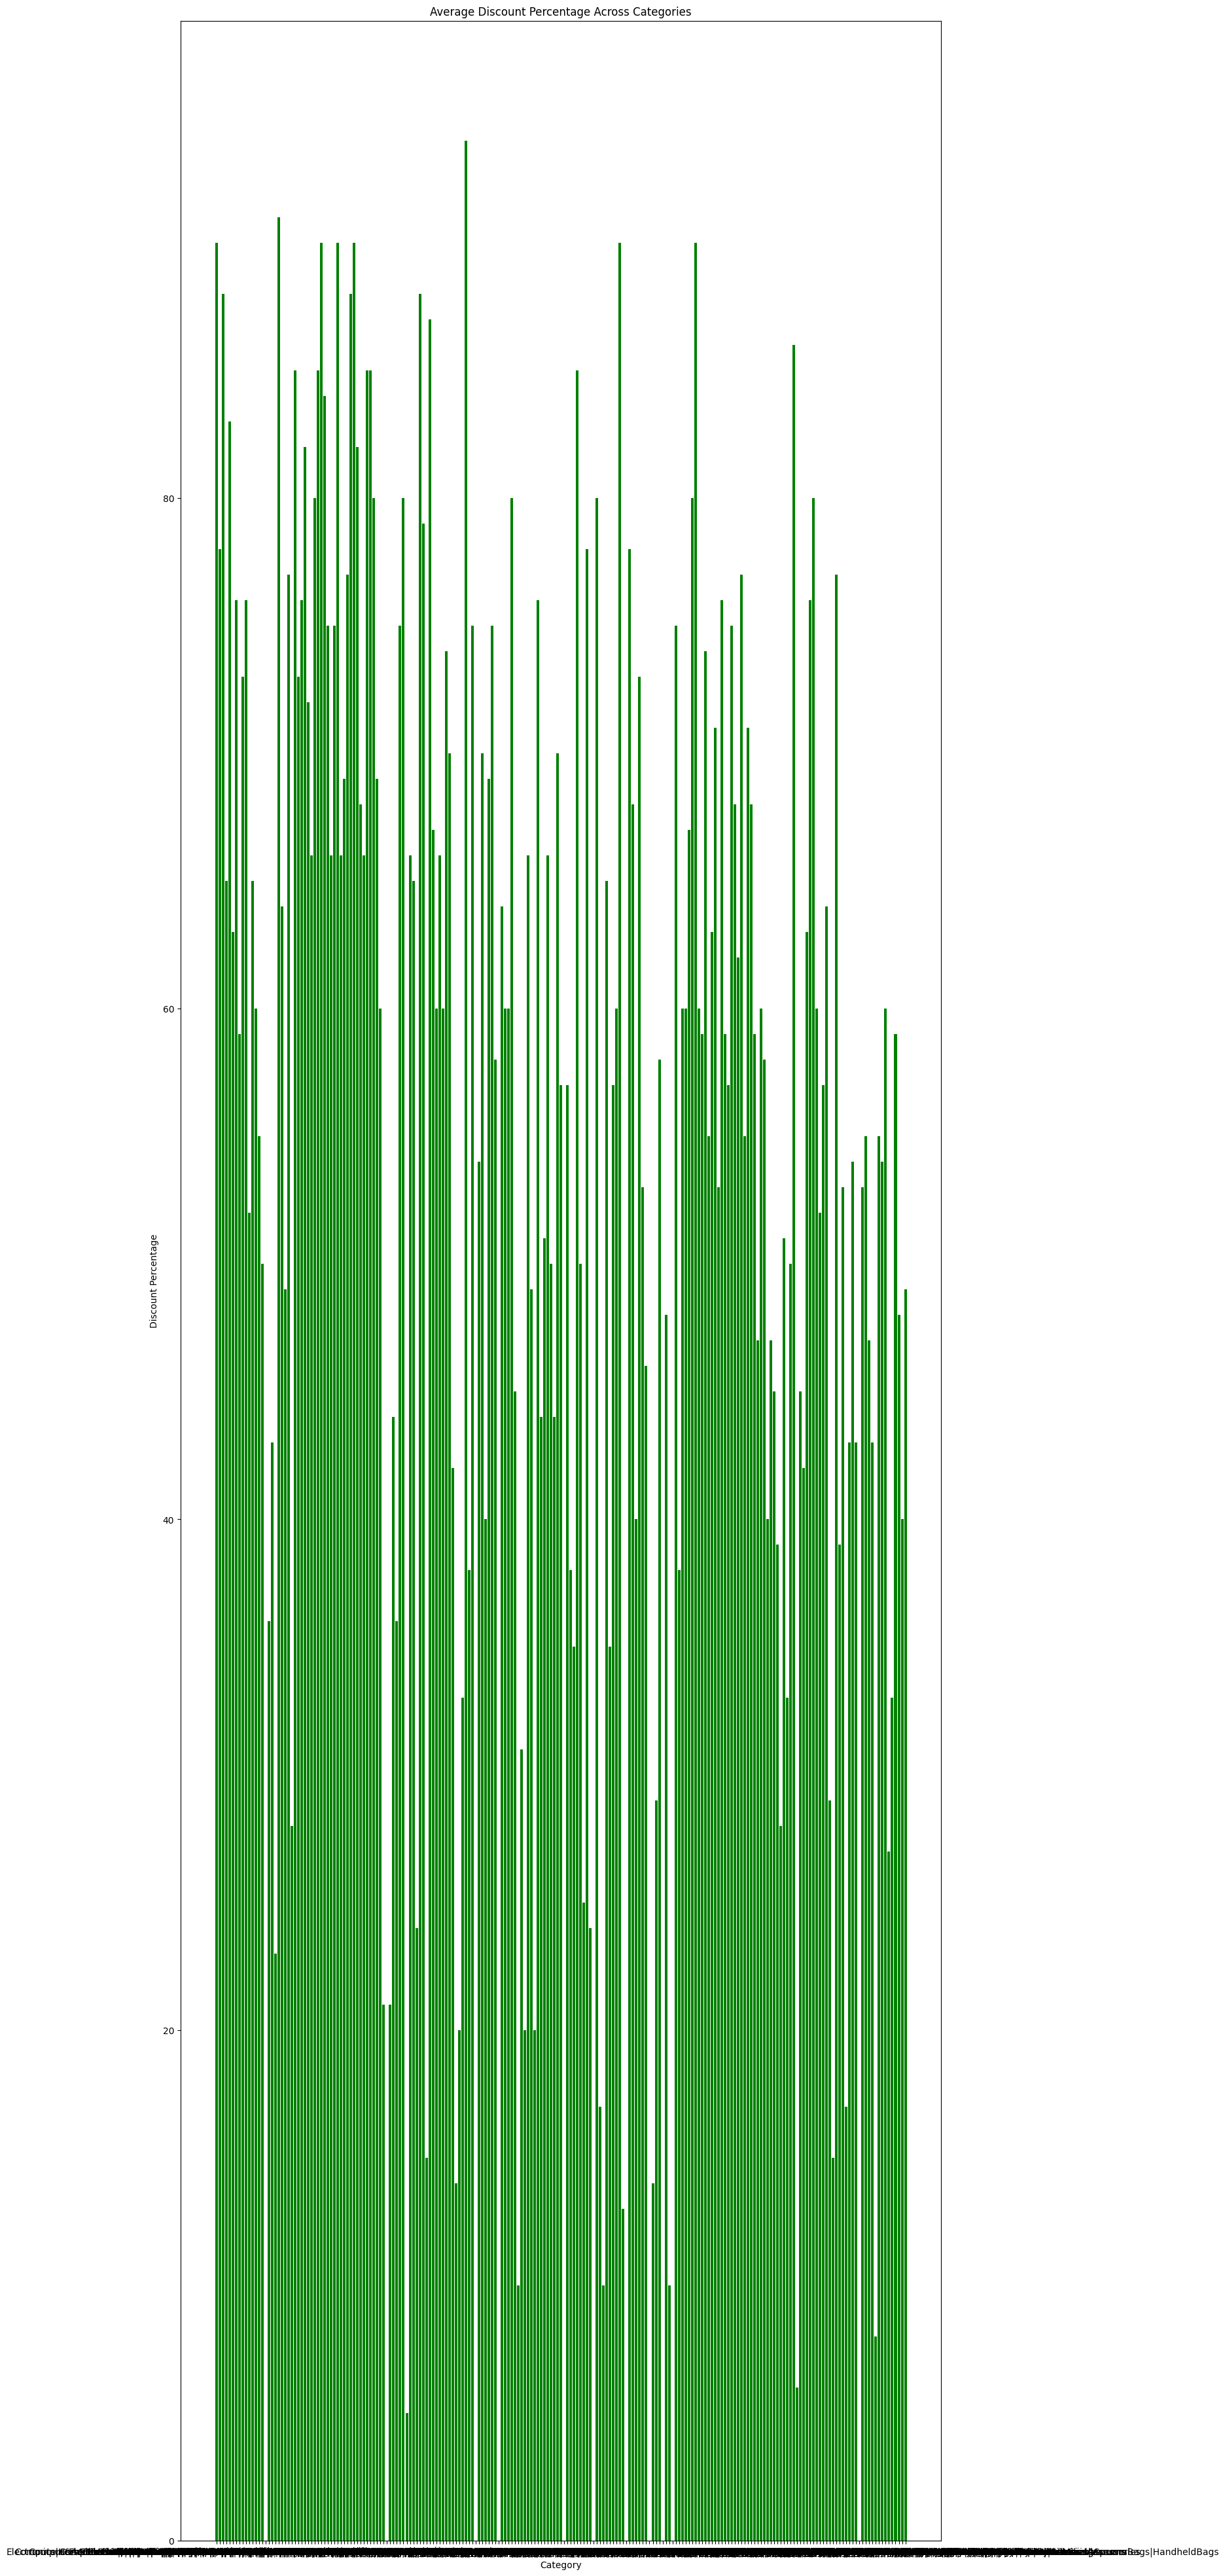

In [ ]:
plt.figure(figsize=(15, 50))
plt.bar(df_a['category'],df_a['discount_percentage'],color='green')
plt.xlabel("Category")
plt.ylabel("Discount Percentage")
plt.title("Average Discount Percentage Across Categories")
plt.show()

**Q 5 What are the most popular product names?**

In [ ]:
df_a.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
df_a['product_name'].value_counts()

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
...,...
"WeCool B1 Mobile Holder for Bikes or Bike Mobile Holder for Maps and GPS Navigation, one Click Locking, Firm Gripping, Anti Shake and Stable Cradle Clamp with 360° Rotation Bicycle Phone Mount",1
"boAt Newly Launched Wave Electra with 1.81"" HD Display, Smart Calling Ultra-Seamless BT Calling Chip, 20 Built-in Watch Faces, 100 + Sports Modes, Menu Personalization, in-Built Games(Cherry Blossom)",1
"STRIFF Multi Angle Tablet/Mobile Stand. Holder for iPhone, Android, Samsung, OnePlus, Xiaomi. Portable,Foldable Stand.Perfect for Bed,Office, Home,Gift and Desktop (Black)",1


**Q 6  What are the most popular product keywords?**

In [ ]:
df_a.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
df_a['product_name'].value_counts().head(10)

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
Flix Micro Usb Cable For Smartphone (Black),3
"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",3
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",3


**Q 7 What are the most popular product reviews?**

In [ ]:
df_a['review_content'].value_counts()

,count
review_content,
"I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a little. Personally, this is good for me.At this price range, this is a good phone. But if you are camera heavy user and expect to perform heavy downloads frequently, this phone may not for you. I am personally satisfied with this phone as it works for my type of usage. I will not go into plus points of this phone as they are covered by other reviews already. I am only attempting to clarify about how this phone can suit you (or not) in terms of camera and heating. I had many questions about these aspects before buying. Perhaps this review will help you make an informed decision to buy (or avoid). Cheers.,Display - BeautyCamera - decentPerformance - AmazingBattery - ok (in 5000mah u expect more tbh)Overall good phone...Also after 1day of use, i found some network connectivity issue in my jiosim, which I'm using right now in this phone, but I'll keep update this review after 1month of usage!,It's a decent mobile under this price but few things worried me , weight of the phone, too many procedure to change some settings, no screen casting. Apart from that it has good touch, a decent camera for day light , battery life is good.,I bought this smartphone for my mom. Samusung interface is very handful for easy use. Battery is superb, last whole day. Camera is mediocre but provide original colour pictures. All in all satisfied with this smartphone that i got in sale for 9499.,Unable to do video call within same service provider as in VOLTE within same service provider video call feature is available.,Product is fine. Nothing Fancy but for the budget it is a good phone.,BATTERY : more than enough for normal use Not sure in gamingCAMERA : good in this segment , can record videos in FHD 30fpsDISPLAY : since it's a LCD display the quality is a bit less , but goodV RAM : you can add upto 2gb of virtual ram but have to sacrifice your storage Space to use it OVERALL A GOOD BUDGET PHONE,Finger print is working speedy battery backup is good camera quality is also good",8
"Good product,long wire,Charges good,Nice,I bought this cable for Rs.339 worthy product for this price, i tested it in various charger adapters 33w and 18w it supports fast charging as well.,Good,Ok,I had got this at good price on sale on Amazon and product is useful with warranty but for warranty you need to go very far not practical for such a cost and mine micro to type c connector stopped working after few days only.,I like this product",7
"I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's still in good shape. I connected my phone to the car using the cable and it got connected well and no issues. I also connected it to the charging port and yes it has Fast Charging support.,It quality is good at this price and the main thing is that i didn't ever thought that this cable will be so long it's good one and charging power is too good and also supports 

**Q 8 What is the correlation between discounted_price and rating?**

In [ ]:
df_a['discounted_price']=df_a['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

In [ ]:
data=pd.concat([df_a['rating'],df_a['discounted_price']],axis=1)
correlation=data.corr(numeric_only=True)
correlation

,rating,discounted_price
rating,1.000000,0.114947
discounted_price,0.114947,1.000000


**Q 9 What are the Top 5 categories based on the highest rating?**

In [ ]:
df_a.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


**Q 10 Identify any potential areas for improvement or optimization based on the data analysis?**

**Handling Rating Data (Q1 & Q8):** You replaced "1" with "0" in the `rating` column. This seems like a potential issue as "1" is a valid rating. You should review the data and the reason for this replacement. Ensure the ratings are correctly interpreted as numerical values (e.g., 1 to 5 stars) for average calculations and correlation analysis.

**Discount Calculation (Q4):** You've calculated the average discount percentage. Exploring the distribution of discount percentages within categories (e.g., using box plots) could reveal which categories offer consistently higher or more varied discounts.

**Popular Product Names and Keywords (Q5 & Q6):** While you identified popular names and keywords, further text analysis (e.g., using libraries like NLTK or spaCy) could extract more meaningful insights from product names, descriptions, and reviews, such as common product features or customer sentiment.

**Correlation between Discounted Price and Rating (Q8):** You've calculated the correlation. Further visualization (e.g., scatter plot) can help understand the nature of this relationship. Is there a clear trend? Are heavily discounted items consistently lower or higher rated?

#**EDA 4 (spotify)**

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_s=pd.read_csv("spotify.csv")
df_s

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


**Q 1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful?**

In [ ]:
df_s.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [ ]:
df_s.duplicated().sum()

np.int64(27)

In [ ]:
df_s=df_s.drop_duplicates()

In [ ]:
df_s

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


**Q 2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram ?**

In [ ]:
df_s.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

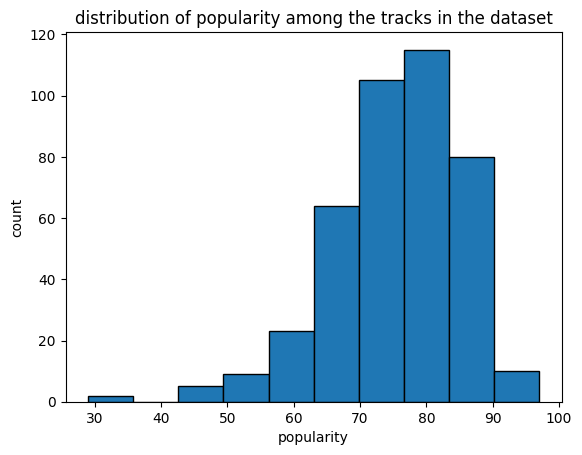

In [ ]:
plt.hist(df_s['Popularity'],bins=10,edgecolor='black')
plt.xlabel("popularity")
plt.ylabel("count")
plt.title("distribution of popularity among the tracks in the dataset")
plt.show()

**Q 3  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?**

In [ ]:
df_s.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

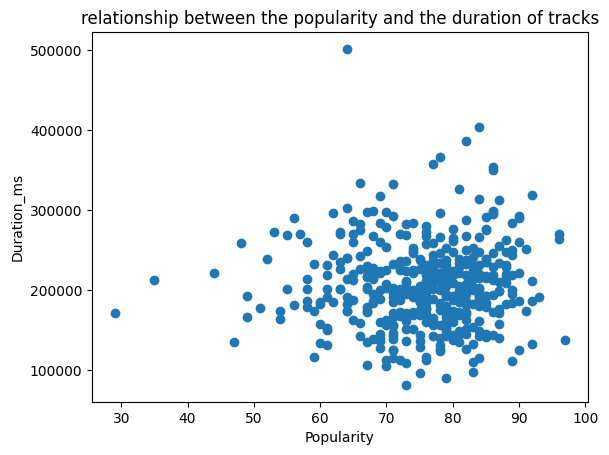

In [ ]:
plt.scatter(df_s['Popularity'],df_s['Duration (ms)'])
plt.xlabel("Popularity")
plt.ylabel("Duration_ms")
plt.title("relationship between the popularity and the duration of tracks")
plt.show()

**Q 4  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot?**

In [ ]:
df_s.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [ ]:
df_s.Artist.value_counts(ascending=False)

,count
Artist,
Drake,17
Eminem,11
Lil Nas X,10
JAY-Z,10
21 Savage,10
...,...
Lil Tjay,1
BigXthaPlug,1
Fat Joe,1


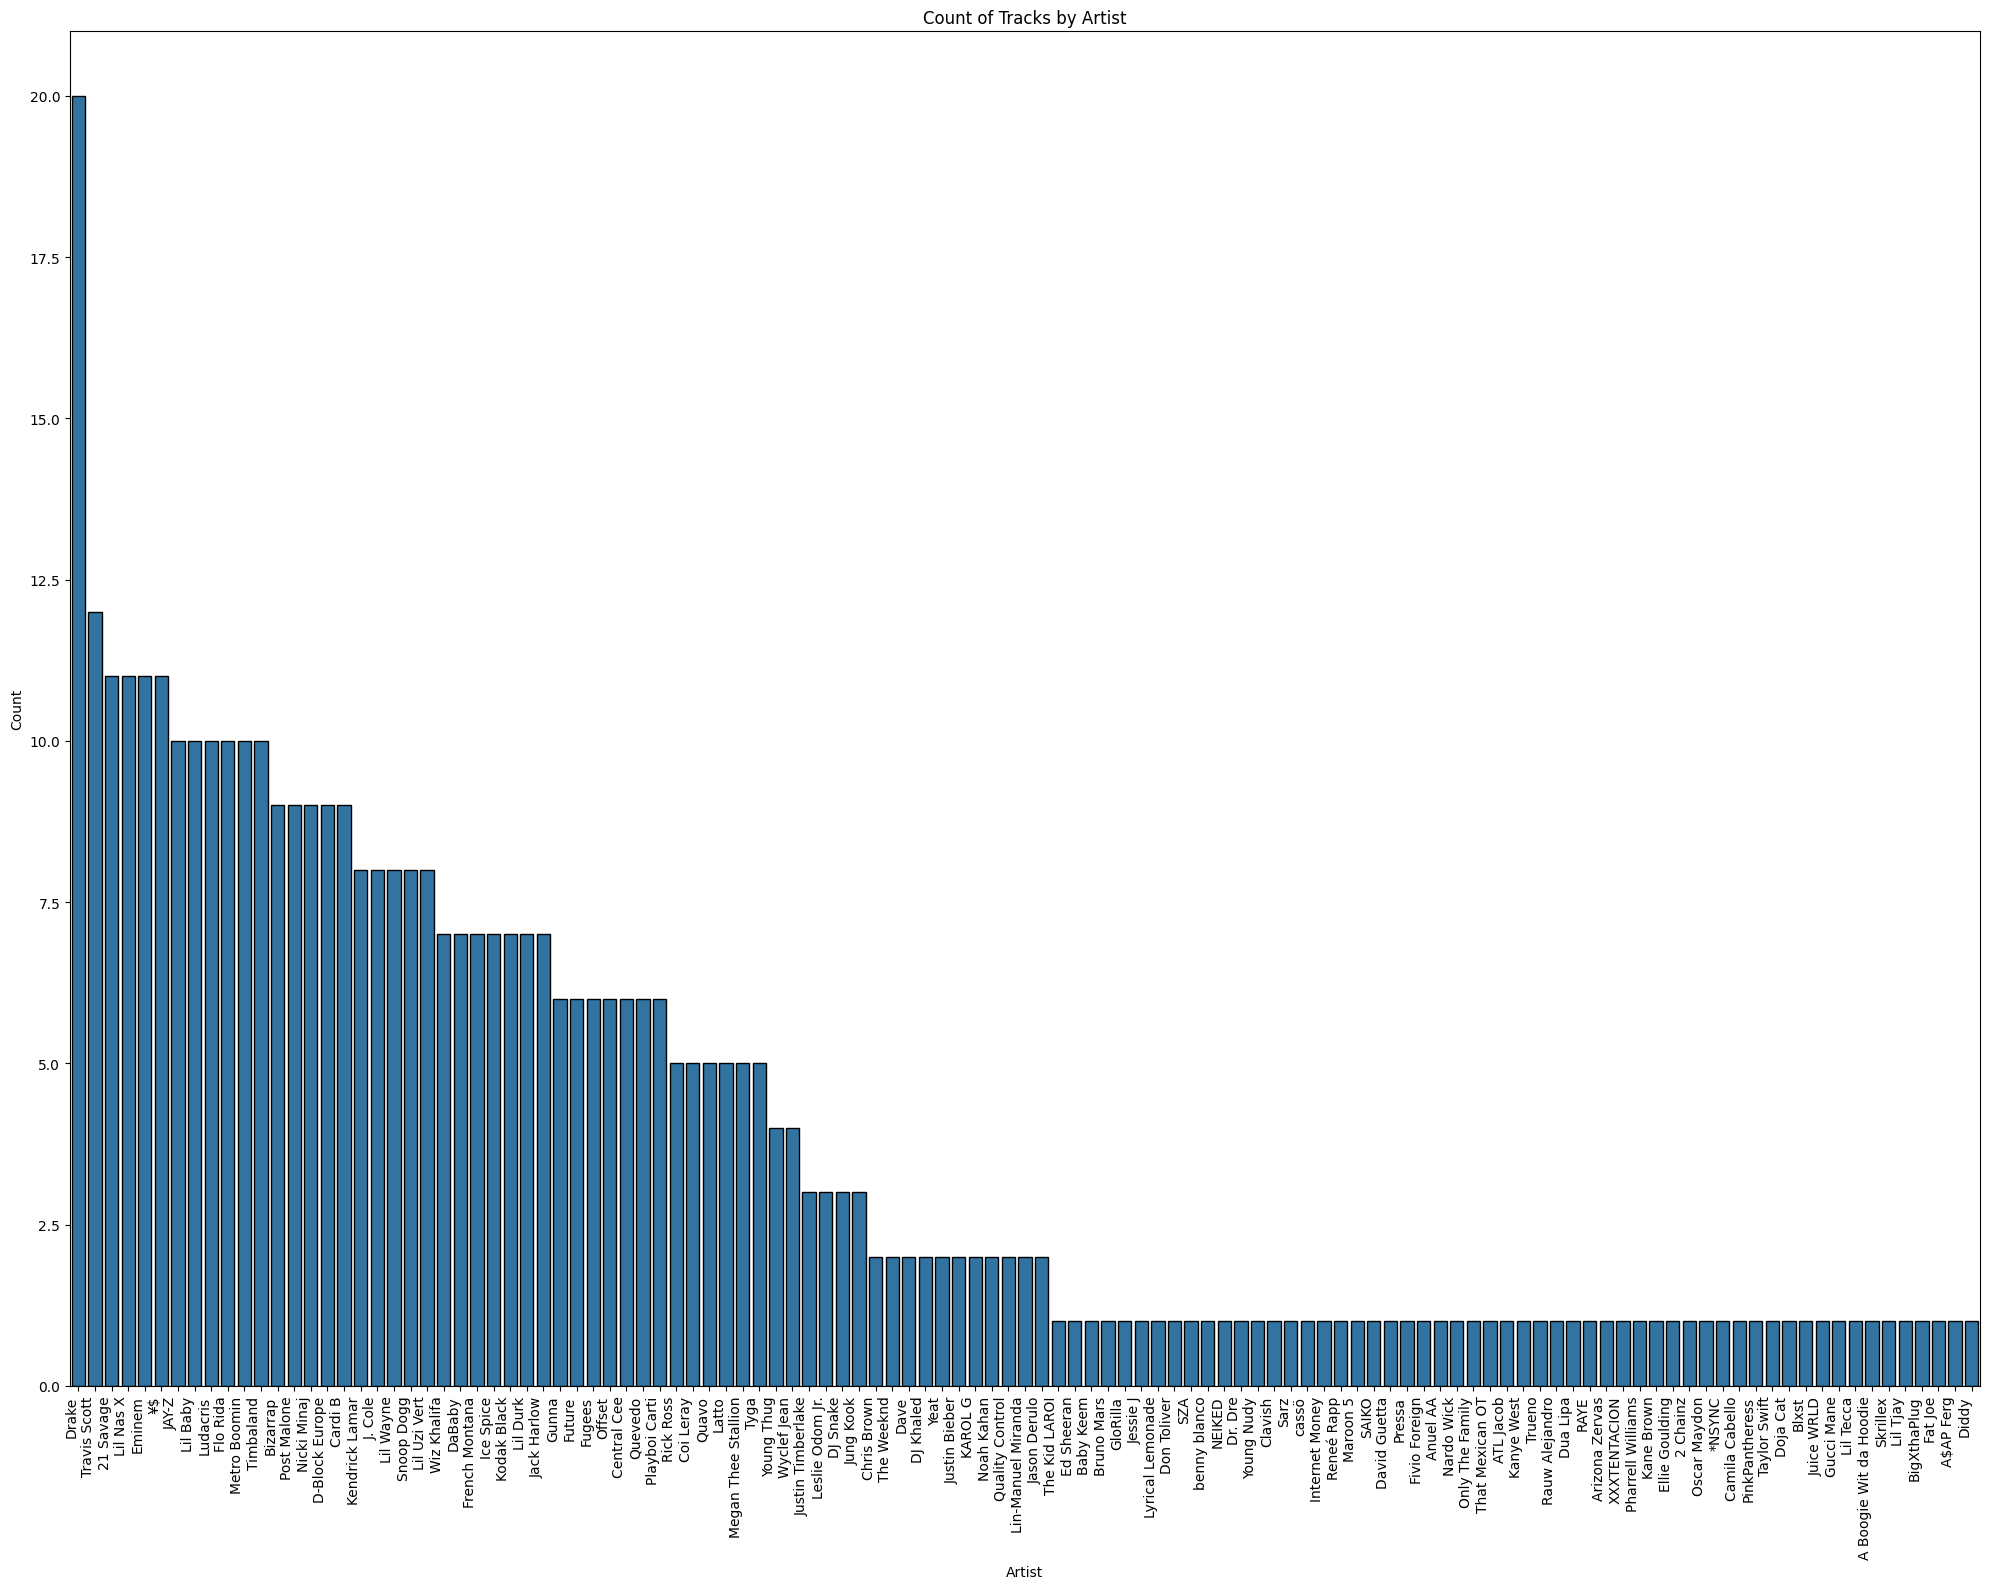

In [ ]:
plt.figure(figsize=(20, 16))
sns.countplot(x='Artist', data=df_s, order=df_s['Artist'].value_counts().index,edgecolor='black')
plt.xlabel("Artist")
plt.ylabel("Count")
plt.title("Count of Tracks by Artist")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Q 5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each ?**

In [ ]:
df_s.sort_values(by='Popularity').head(5)

,Artist,Track Name,Popularity,Duration (ms),Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333,28hgx2bWXcaBJeC9zVwrBq


**Q 6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist ?**

In [ ]:
df_s.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [ ]:
df_s.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


**Q 7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist ?**

In [ ]:
df_s.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [ ]:
[df_s.groupby('Artist')['Track Name'].value_counts().head(5)]

[Artist     Track Name                            
 *NSYNC     Better Place (Reunion)                    1
 2 Chainz   We Own It (Fast & Furious)                1
 21 Savage  Ghostface Killers (feat. Travis Scott)    1
            Glock In My Lap                           1
            all of me                                 1
 Name: count, dtype: int64]

**Q 8 Visualize relationships between multiple numerical variables simultaneously using a pair plot ?**

In [ ]:
df_s.dtypes

,0
Artist,object
Track Name,object
Popularity,int64
Duration (ms),int64
Track ID,object


In [ ]:
numerical_data=[df_s['Popularity'],df_s['Duration (ms)']]
df_datas=pd.DataFrame(numerical_data)
df_datas
plt.figure(figsize=(10, 6))
sns.pairplot(df_datas)
plt.show()

**Q 9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot?**

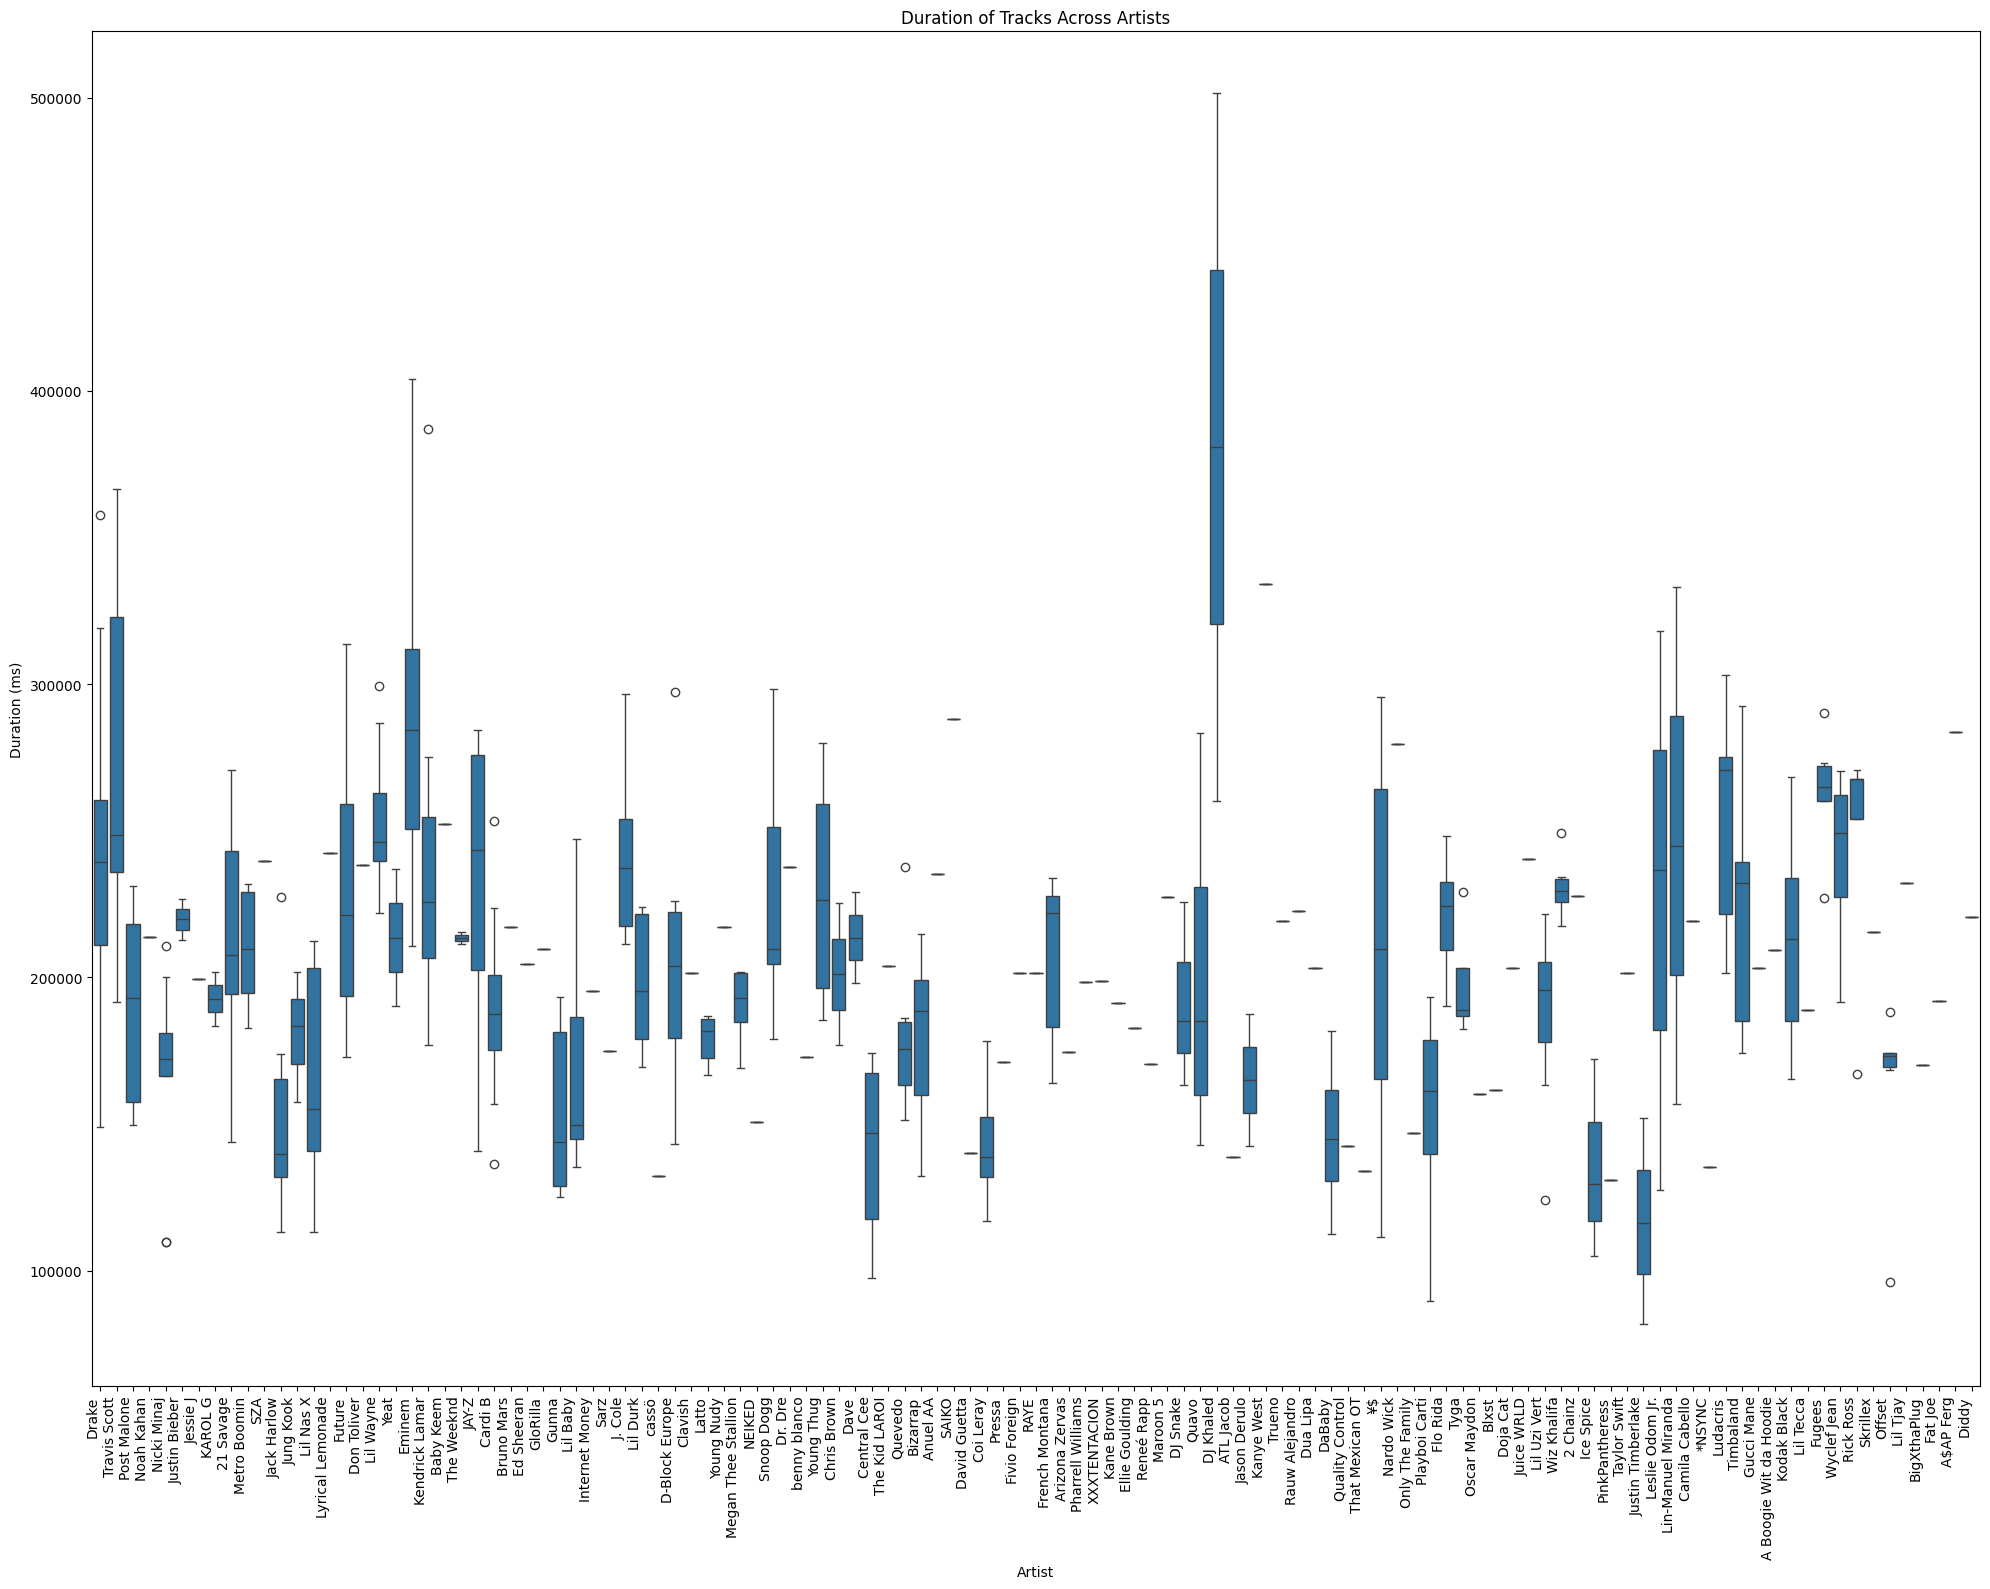

In [ ]:
df_s.groupby('Artist')['Duration (ms)'].value_counts()
plt.figure(figsize=(20, 16))
sns.boxplot(x='Artist', y='Duration (ms)', data=df_s)
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.title("Duration of Tracks Across Artists")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Q 10  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot?**

In [ ]:
df_s.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

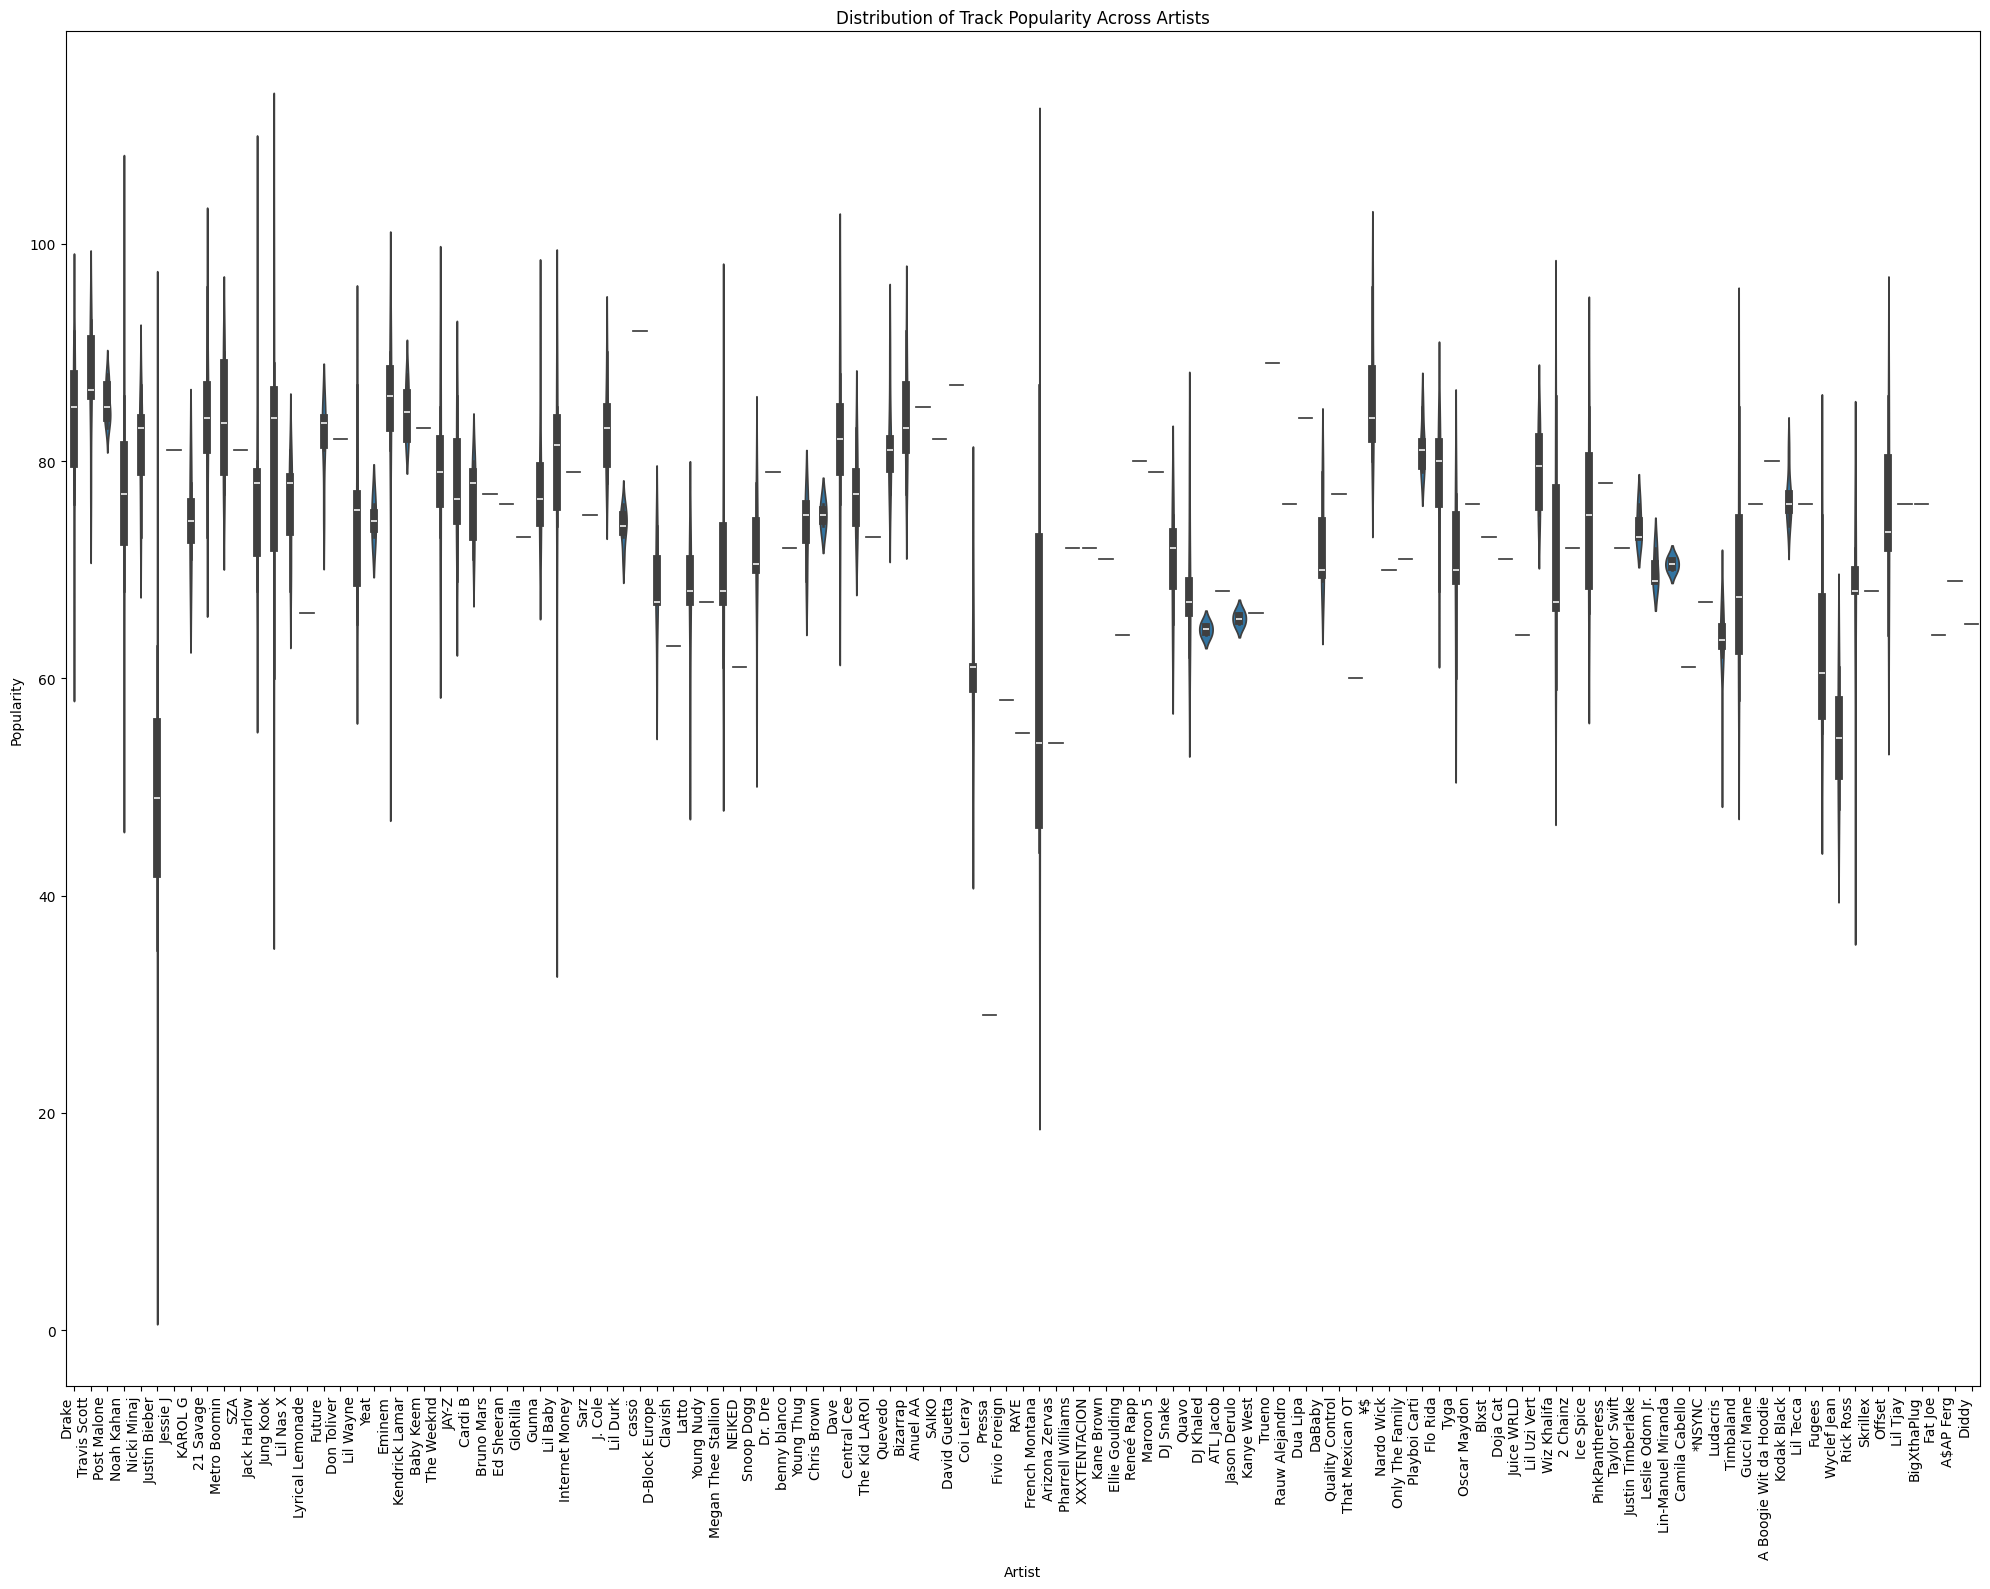

In [ ]:
df_s.groupby('Artist')['Popularity'].value_counts()
plt.figure(figsize=(20, 16))
sns.violinplot(x='Artist', y='Popularity', data=df_s)
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.title("Distribution of Track Popularity Across Artists")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()